# **Comparing Model with Review Scrapped Dataset**

**Study case:**\
Saya suka bermain games untuk mengisi waktu luang saya disaat jenuh. Kebetulan, ujian Text Mining ini menugaskan saya untuk melakukan sebuah analisa hingga membentuk sebuah model prediktif untuk memprediksi rating dari review sebuah game yang saya ingin/sudah mainkan. Untuk kasus ini, saya akan mempersiapkan sebuah dataset dengan melakukan scraping review-review dari game bernama **"JetPack Joyrider".** Setelah scrapping selesai, akan ada alur proses serta penjelasan yang akan tertera dibawah ini.

## **1. Scraping Data dari Playstore**
---

Scraping data disini akan saya lakukan untuk mengambil review dari game masa kecil saya, yaitu *"Jet Pack Joyrider"*. Scraping saya lakukan dengan memanfaatkan library *"google_play_scrapper"*.

``` python
    print("Cara install library tersebut adalah sebagai berikut:")
    !pip install google-play-scraper
```
Setelah library telah ter-*install*, kode dibawah ini akan mendemonstrasikan bagaimana proses scrappingnya terjadi.

In [1]:
# Scraping review game Jetpack
# Jetpack joy rider (com.halfbrick.jetpackjoyride) -> bagaimana cara mendapatkan bagian ini? (Lihat gambar dibawah)

from google_play_scraper import reviews_all

data = reviews_all(
    'com.halfbrick.jetpackjoyride',
    lang = 'en',
    country = 'id'
)

![Cara Mendapatkan URL Game/App](./image/how-to-get-url.png)

In [2]:
# Setelah scraping selesai, disini saya mengubah hasil scraping menjadi bentuk pandas dataframe untuk mempermudah proses
import pandas as pd

df = pd.DataFrame(data)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1072add6-83c7-427e-b5cf-af75d4b16655,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it's good but why so many ads?,3,0,None,2025-11-10 20:21:48,None,NaT,None
1,02a415c7-b40e-4805-a194-368ce926bbe2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,an absurd amount of predatory ads and expensiv...,2,0,1.102.4,2025-11-10 06:13:23,None,NaT,1.102.4
2,64a7aa2b-f76e-4cf3-be7e-6316e95ab9aa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,1.102.4,2025-11-09 23:24:34,None,NaT,1.102.4
3,506c1867-7ffe-469d-9b13-f2f78b90af87,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The music is hype.,4,0,1.102.4,2025-11-09 19:58:04,None,NaT,1.102.4
4,a06a812e-a8aa-400c-831c-4bf610305ff1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Nothing to say about this, it's pure wonderful...",5,0,None,2025-11-09 15:03:49,None,NaT,None


In [3]:
# Pada proses ini, saya hanya akan mengambil kolom yang dibutuhkan saja untuk membuat evaluasi model nanti
df = df[['at', 'content', 'score']] # -> ambil kolom yang dibutuhkan saja 
df.to_csv("scraped_data.csv", index = False)
df.head()

,at,content,score
0,2025-11-10 20:21:48,it's good but why so many ads?,3
1,2025-11-10 06:13:23,an absurd amount of predatory ads and expensiv...,2
2,2025-11-09 23:24:34,good,5
3,2025-11-09 19:58:04,The music is hype.,4
4,2025-11-09 15:03:49,"Nothing to say about this, it's pure wonderful...",5


#### **Progress Catchup**
---
Sampai di titik ini, saya sudah menjalankan program untuk menyelesaikan kasus untuk nomor 1 pada soal. Rangkuman progress hingga titik ini adalah sebagai berikut:
1. Scrapping data dari playstore dengan game berjudul "Jetpack Joyrider"

## **2. Exploratory Data Analysis & Sisipan Preprocessing**
---

Setelah proses scraping berhasil dilakukan, pada tahap ini saya ingin mencaritau dan mengenal lebih dalam lagi mengenai data yang saya miliki dengan prinsip EDA *(Explanatory Data Analyst)*

In [ ]:
import pandas as pd
# baca data
# this dataset is from scraping 2/3 days in difference between the "scraped_data.csv"
df = pd.read_csv("jetpackJoyride_uncleaned.csv")

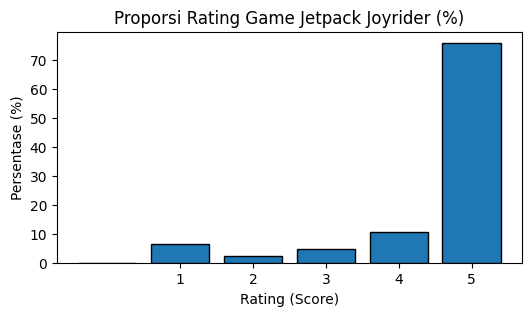

In [64]:
# Melihat proporsi dari data berdasarkan ratingnya
import matplotlib.pyplot as plt

rating_counts = df["score"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(6,3))
plt.bar(rating_counts.index, rating_counts.values, edgecolor="black")
plt.title("Proporsi Rating Game Jetpack Joyrider (%)")
plt.xlabel("Rating (Score)")
plt.ylabel("Persentase (%)")
plt.xticks([1,2,3,4,5])
plt.show()

In [65]:
print(df['score'].value_counts())

# Ambil sample sesuai proporsi
rating5 = df[df['score'] == 5].sample(5638, random_state=42)
rating4 = df[df['score'] == 4].sample(794, random_state=42)
rating1 = df[df['score'] == 1].sample(476, random_state=42)
rating3 = df[df['score'] == 3].sample(356, random_state=42)
rating2 = df[df['score'] == 2].sample(161, random_state=42)
rating0 = df[df['score'] == 0].sample(1, random_state=42)  # minimal 1 + untuk preprocessing

# # ambil semua data selain rating 5
# other = df[df['score'] != 5]
# gabungkan lagi
df = pd.concat([rating5, rating4, rating3, rating2, rating1, rating0 ], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

print(df['score'].value_counts())

# simpan ke csv
df.to_csv("balanced_dataset.csv", index=False)

score
5    215622
4     30355
1     18225
3     13614
2      6141
0         2
Name: count, dtype: int64
score
5    5638
4     794
1     476
3     356
2     161
0       1
Name: count, dtype: int64


In [66]:
# Menampilkan 5 data pertama dan tipe data yang dimiliki setiap kolomnya
display(df.head())
display(df.info())

,at,content,score
0,2020-08-16 21:08:23,I LOVED this game i played since 2018 -2020,5
1,2013-06-08 19:43:47,Wah,5
2,2017-04-17 01:26:34,It is wonderful,5
3,2013-03-29 12:23:43,Whos the creater he must be cool,5
4,2017-12-05 23:52:08,It s a nice game,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   at       7426 non-null   object
 1   content  7361 non-null   object
 2   score    7426 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 174.2+ KB


None

In [67]:
df.shape

(7426, 3)

In [68]:
# Melihat ada berapa banyak data entry yang masuk berdasarkan score
# (+) untuk sekalian lihat apa ada data yang ga konsisten (score = 0)
print(f"Before : \n{df['score'].value_counts()}")

# Dikarenakan ada 2 data entry yang memiliki score == 0 disini saya akan menghapus data entry tersebut
df = df[df['score'] != 0]

print(f"\nAfter : \n{df['score'].value_counts()}")
print(df.shape)

Before : 
score
5    5638
4     794
1     476
3     356
2     161
0       1
Name: count, dtype: int64

After : 
score
5    5638
4     794
1     476
3     356
2     161
Name: count, dtype: int64
(7425, 3)


In [69]:
# Lihat semua null value 
df.isna().sum()

at          0
content    65
score       0
dtype: int64

**Yang jadi masalah utama** adalah *content* yang memiliki 65 null value, content ini penting karena ini adalah pusat inti dari tugas dan program ini. jadi saya akan mencoba menghapus missing value / null value di *content* 

In [70]:
# Hapus null val di "content"
df = df.dropna(subset=['content'])

In [71]:
display(df.isna().sum()) # lihat lagi null value yang ada
print(f"Dimensi setelah hapus Null Val: {df.shape}") # lihat dimensi setelah null value di hapus
print(df['score'].value_counts())

at         0
content    0
score      0
dtype: int64

Dimensi setelah hapus Null Val: (7360, 3)
score
5    5588
4     788
1     473
3     351
2     160
Name: count, dtype: int64


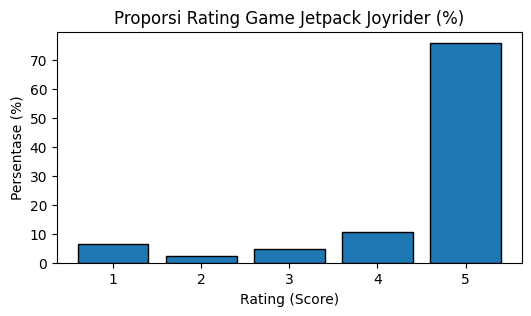

In [72]:
# Melihat proporsi dari data berdasarkan ratingnya
import matplotlib.pyplot as plt

rating_counts = df["score"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(6,3))
plt.bar(rating_counts.index, rating_counts.values, edgecolor="black")
plt.title("Proporsi Rating Game Jetpack Joyrider (%)")
plt.xlabel("Rating (Score)")
plt.ylabel("Persentase (%)")
plt.xticks([1,2,3,4,5])
plt.show()

### **Sisipan Preprocessing**
---
Untuk mendapatkan insight lebih dalam mengenai dataset yang saya miliki, dalam proses EDA ini saya memutuskan untuk menyisipkan preprocessing seperti membersihkan tulisan dari tanda baca dan text error lainnya. Hal ini akan membantu saya untuk menggali insight seperti kata-kata yang dominan disetiap rating, dsb.

In [73]:
# Membuat fungsi untuk membersihkan text dari seperti tanda baca, angka, url, dsb.
import re 

def clean_text(text):
    text = text.lower()  # ubah semua ke lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # untuk menghapus URL yang mungkin ngikut
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # hapus angka & tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi ganda & spasi di awal/akhir
    return text

In [74]:
# Membersihkan semua content/text yang ada di dataset
df['clean_content'] = df['content'].apply(clean_text)

In [75]:
# Lihat perbandingan sebelum dan sesudah 'content' di bersihkan
print(f"Sebelum: {df['content'][4]}")

# Sesudah dibersihkan
print(f"Sesudah: {df['clean_content'][4]}")

Sebelum: It s a nice game
Sesudah: it s a nice game


#### **Eksplorasi Kata Dominan setiap Skor**
---

Sebelum saya melihat lihat kata kata yang dominan dalam dataset, saya akan melakukan *tokenizing* dan *stopwords*, kenapa? Tokenizing digunakan untuk membagi kalimat menjadi *token* per-kata dan stopwords gunannya untuk menghilangkan kata-kata sambung seperti 

``` python
    text = "aku makan nasi di rumah"
    token = ["aku", "makan", "nasi", "di", "rumah"]
    stopwords = ["aku", "makan", "nasi", "rumah"]
```
Hal ini saya lakukan untuk mendapatkan pecahan kata dari sebuah kalimat untuk tau intensitasnya di setiap segmen rating/score 


In [76]:
# Mengubah kalimat menjadi token dan menghilangkan stopwordnya
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # -> download stopword yang akan digunakan, berhubung datanya dalam bahasa inggris disini saya pasang 'english'

def remove_stopwords(text): # -> membuat fungsi untuk menghilangkan stopword dalam token
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

stop_words = set(stopwords.words('english'))
df['tokens'] = df['clean_content'].apply(lambda x: [w for w in x.split() if w not in stop_words])

# terapkan ke content text di dataframe dan simpan di kolom baru
df['tokens'] = df['clean_content'].apply(remove_stopwords) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
df.head()

,at,content,score,clean_content,tokens
0,2020-08-16 21:08:23,I LOVED this game i played since 2018 -2020,5,i loved this game i played since,"[loved, game, played, since]"
1,2013-06-08 19:43:47,Wah,5,wah,[wah]
2,2017-04-17 01:26:34,It is wonderful,5,it is wonderful,[wonderful]
3,2013-03-29 12:23:43,Whos the creater he must be cool,5,whos the creater he must be cool,"[whos, creater, must, cool]"
4,2017-12-05 23:52:08,It s a nice game,3,it s a nice game,"[nice, game]"


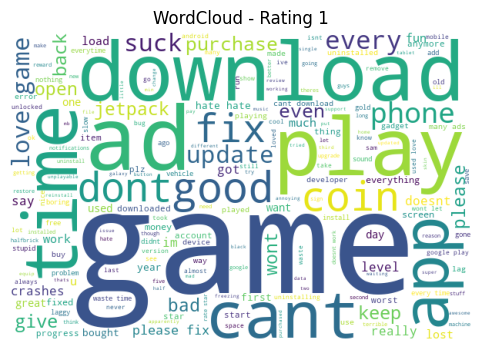

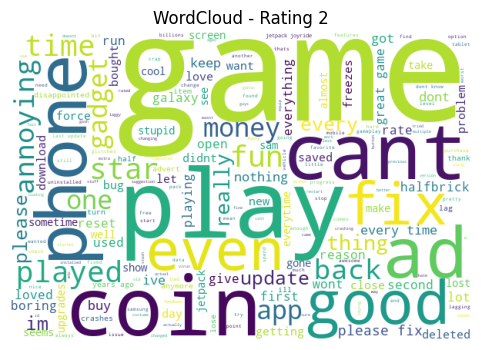

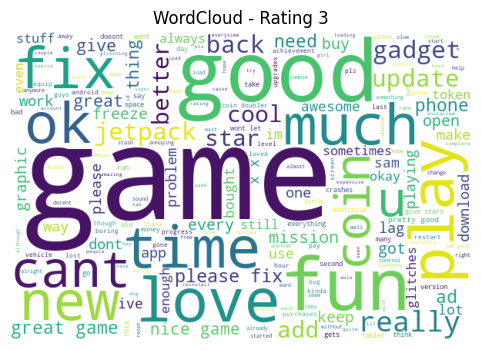

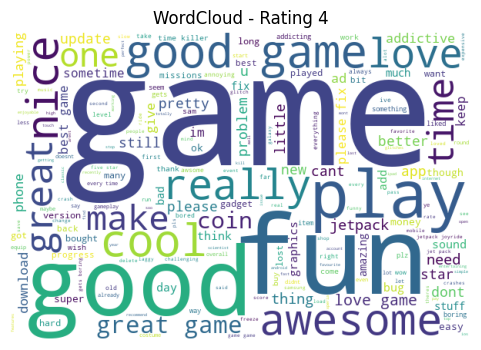

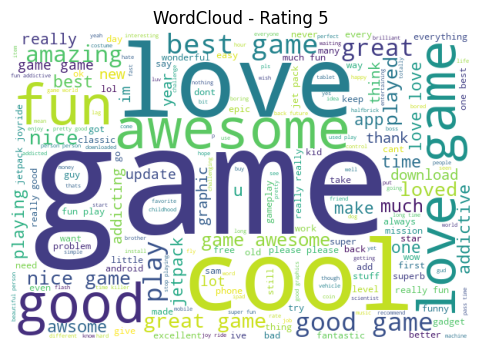

In [78]:
# Membuat Word Cloud untuk tau intensitas kata dalam rating yang berbeda
from wordcloud import WordCloud

for rating in sorted(df['score'].unique()):
    text = ' '.join([' '.join(tokens) for tokens in df[df['score']==rating]['tokens']])
    plt.figure(figsize=(6,4))
    plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(text))
    plt.title(f'WordCloud - Rating {rating}')
    plt.axis('off')
    plt.show()

#### **Eksplorasi Kata Berhubungan**
---

Disini saya memiliki ide untuk mencari apakah ada kata-kata yang berhubungan dan membuat berarti tertentu di setiap ratingnya. Untuk mencari tahu, disini saya akan memanfaatkan n-gram dengan mengambil 3 kata yang berhubungan
``` python
    text = "i really love this game"

    # kalo cuma tokenize sama stopword
    token = ["i", "really", "love", "this", "game"]
    stopwords = ["i", "really", "love", "game"]

    # kalo bigrams/ngrams -> n = 3
    bigrams = {
        [bigram: "really love game", frequency : 200]
    }
```
Nah kalo bigrams, kita bisa tau ada berapa banyak "kalimat" (gabungan dari 3 kata) itu di dalam dokumen/dataframe kita


In [79]:
# Melihat intensitas bigrams untuk setiap rating
from collections import Counter

def get_ngrams(tokens, n=2): # -> fungsi untuk ekstraksi pasangan kata dari kolom token
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigram_freq = {} # -> frekuensi bigram itu keluar di document

for rating in sorted(df['score'].unique()): # -> print hasilnya berulang selama ada unique value di score (sorted)
    all_bigrams = [] # -> list kosong untuk di isi dengan jumlah bigrams  
    for tokens in df[df['score'] == rating]['tokens']:
        all_bigrams.extend(get_ngrams(tokens, n=3)) # -> mengambil 3 kata yang berhubungan
    bigram_freq[rating] = Counter(all_bigrams).most_common(10) # -> hitung tiap kata yg sama keluar dan menampilkan 10 terbanyak (top 10)
    print(f"Top 10 bigrams Rating {rating}:")
    print(bigram_freq[rating])
    print()


Top 10 bigrams Rating 1:
[('hate hate hate', 10), ('used love game', 4), ('wont let download', 4), ('really love game', 3), ('around world around', 3), ('world around world', 3), ('fix rate stars', 3), ('way many ads', 3), ('game used fun', 2), ('worst game ever', 2)]

Top 10 bigrams Rating 2:
[('play please fix', 2), ('great game since', 1), ('game since update', 1), ('since update keeps', 1), ('update keeps crashing', 1), ('wont even let', 1), ('even let play', 1), ('let play please', 1), ('please fix bug', 1), ('fix bug rate', 1)]

Top 10 bigrams Rating 3:
[('x x x', 7), ('takes much space', 3), ('pretty good game', 2), ('great game love', 2), ('please bring back', 2), ('would give stars', 2), ('halfbrick studios team', 1), ('studios team amazing', 1), ('team amazing game', 1), ('amazing game love', 1)]

Top 10 bigrams Rating 4:
[('make game make', 6), ('game make game', 6), ('great time killer', 5), ('best game ever', 5), ('love game really', 5), ('really fun play', 3), ('really en

#### **Preprocessing -> Lemmatization**
---
Untuk proses terakhir di bagian preprocessing, saya akan melakukan lemmatization. Kenapa lemmatization? kenapa ngga stemming?\
alasannya adalah sebagai berikut:
1. Berdasarkan soal yang didapat, "token paling efektif yang sesuai kaidah tata bahasa dan sebisa mungkin makna kata tersebut tidak berubah apalagi kelas katanya."
2. Lemmatization melakukan apa yang diminta dari perintah itu, membuat token yang paling efektif dan sesuai kaidah tata bahasa dan tidak merubah kelasnya.
3. Perbedaan fungsi dan cara kerja lemmatization dan stemming
    - Konsep dasar Stemming: Potong kata pakai aturan sederhana (hapus akhiran/awalan untuk menjadikan kata ke bentuk dasar); 
    - Konsep dasar Lemmatization: Ubah kata ke lemma (bentuk dasar) berdasarkan arti & tata bahasa

In [80]:
# Import nltk (natural language toolkit)
import nltk
nltk.download('averaged_perceptron_tagger') # -> model POS Tagger, dipake oleh nltk.pos_tag() untuk mengenali jenis kata (noun, verb, adj, dll).
nltk.download('wordnet') # -> kamus leksikal besar untuk Bahasa Inggris
nltk.download('punkt') # -> untuk memecah teks jadi kata atau kalimat.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kadek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Dalam proses preprocessing token ke text lemmatization diperlukan membuat fungsi untuk memberitahu WordNet karena si WordNet tidak tau kode NLTK POS (Part of Speech, misal VB, NN, JJ, dst.). Di mana kode-kode ini seperti SPOK (Subjek, Predikat, Objek, Keterangan) kalo di bahasa Indonesia. Kode-kode yang diketahui oleh wordnet adalah sebagai berikut
1. `'n'` → noun (kata benda)
2. `'v'` → verb (kata kerja)
3. `'a'` → adjective (kata sifat)
4. `'r'` → adverb (kata keterangan)

Kenapa hal ini diperlukan? berikut contoh penerapan singkatnya:
``` python
    lemmatizer.lemmatize('running')  # tanpa POS
    # hasil: 'running'

    lemmatizer.lemmatize('running', 'v')  # dengan POS verb
    # hasil: 'run'
```
Jadi intinya **lemmatizer biar tau harus pake aturan apa untuk mengubah katanya tanpa ngubah kelasnya**

In [81]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

# Membuat fungsi untuk mengubah POS tag ke format WordNet
# POS = Part of Speech
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # default

lemmatizer = WordNetLemmatizer()

# Fungsi utama lemmatization
def lemmatize_text(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]
    return lemmatized

In [82]:
df['tokens'][2]

['wonderful']

In [83]:
# Apply lemmatizer ke kolom yang sudah di tokenize dan stopwords
df['tokens'] = df['clean_content'].apply(lemmatize_text)

In [84]:
df['tokens'][2]

['it', 'be', 'wonderful']

In [85]:
df.head()

,at,content,score,clean_content,tokens
0,2020-08-16 21:08:23,I LOVED this game i played since 2018 -2020,5,i loved this game i played since,"[i, love, this, game, i, play, since]"
1,2013-06-08 19:43:47,Wah,5,wah,[wah]
2,2017-04-17 01:26:34,It is wonderful,5,it is wonderful,"[it, be, wonderful]"
3,2013-03-29 12:23:43,Whos the creater he must be cool,5,whos the creater he must be cool,"[who, the, creater, he, must, be, cool]"
4,2017-12-05 23:52:08,It s a nice game,3,it s a nice game,"[it, s, a, nice, game]"


#### **Train Test Split Before Oversampling**
---

In [86]:
# KEY : duplikat df nya dulu buat misahin yang mana yang belum oversampling, yang mana uda oversampling
cleaned_df = df.copy()  

In [87]:
cleaned_df.head()

,at,content,score,clean_content,tokens
0,2020-08-16 21:08:23,I LOVED this game i played since 2018 -2020,5,i loved this game i played since,"[i, love, this, game, i, play, since]"
1,2013-06-08 19:43:47,Wah,5,wah,[wah]
2,2017-04-17 01:26:34,It is wonderful,5,it is wonderful,"[it, be, wonderful]"
3,2013-03-29 12:23:43,Whos the creater he must be cool,5,whos the creater he must be cool,"[who, the, creater, he, must, be, cool]"
4,2017-12-05 23:52:08,It s a nice game,3,it s a nice game,"[it, s, a, nice, game]"


In [88]:
# Token yang sudah di lemmatization dimasukin ke satu kolom jadi satu string. Kenapa? karena tahap selanjutnya akan menjalankan TF-IDF dan TF-IDF perlunya string bukan list of tokens
# Kenapa di token-in kalo bakal di sambung lagi? karena WordNetLemmatizer (dan fungsi pos_tag()) itu kerjanya per kata, bukan per kalimat.
cleaned_df['processed_text'] = cleaned_df['tokens'].apply(lambda x: ' '.join(x))

In [89]:
cleaned_df.head()

,at,content,score,clean_content,tokens,processed_text
0,2020-08-16 21:08:23,I LOVED this game i played since 2018 -2020,5,i loved this game i played since,"[i, love, this, game, i, play, since]",i love this game i play since
1,2013-06-08 19:43:47,Wah,5,wah,[wah],wah
2,2017-04-17 01:26:34,It is wonderful,5,it is wonderful,"[it, be, wonderful]",it be wonderful
3,2013-03-29 12:23:43,Whos the creater he must be cool,5,whos the creater he must be cool,"[who, the, creater, he, must, be, cool]",who the creater he must be cool
4,2017-12-05 23:52:08,It s a nice game,3,it s a nice game,"[it, s, a, nice, game]",it s a nice game


In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_df['processed_text'], cleaned_df['score'], test_size=0.2, random_state=42, stratify=cleaned_df['score'])

# stratify=df['score']
# line diatas ini berguna untuk memisahkan data train dan test dengan mempertahankan proporsi rating seperti aslinya.
# jadi misalnya, kalau 20% data rating 1 ada di dataset asli, maka 20% rating 1 juga ada di test set. Begitu juga dengan rating 2–5.

#### **Summary**
---
Dari beberapa proses yang sudah tertera diatas, saya mendapat beberapa poin penting, yaitu:
1. Shape/dimensi dari dataset dari `(283956, 3)` menjadi `(7426, 3)` karena data hasil scraping yang sangat banyak dan saya scale down untuk meringankan model
2. **Penting**, jumlah data yang sangat tidak seimbang. Dataset di dominasi oleh data entry rating 5 dengan proporsi > ~70%.
3. Berdasarkan Wordcloud, kata-kata di setiap ratingnya sesuai dengan ekspektasi, dimana misalnya:
    - rating 1 -> "boring", "add" (iklan), "cant download", dst.
    - rating 5 -> "love", "best", dst.
4. Implementasi bigrams yang sangat membantu menggali insight seperti apa kata yang berhubungan dan terkandung di rating tertentu, pada rating 1 banyak yang menyinggung "worst game ever", "cant even download", "hate hate hate". jadi disini kita bisa lihat bagaimana menyelipkan preprocessing bisa membantu dalam proses EDA

#### **Progress Catchup**
---
Sampai di titik ini, saya sudah menjalankan program untuk menyelesaikan kasus untuk nomor 1, 2, dan 3 pada soal. Rangkuman progress hingga titik ini adalah sebagai berikut:
1. Preprocessing, menghapus nilai kosong di `'score'`
2. EDA, seperti tipe data, dimensi dan value count yang dimiliki tiap rating
3. EDA, melihat proporsi dataset berdasarkan ratingnya
4. Preprocessing, membuat token (tokenize) dan implementasi stopwords untuk menganalisa keyword yang dominan muncul pada dataframe
5. EDA, melihat intensitas kata kata dengan wordcloud dan data yang sudah di tokenize
6. Preprocessing & EDA, implementasi Ngrams dengan menggabungkan 3 kata untuk melihat hubungan antar kata yang membentuk suatu makna
7. Preprocessing, Train test split

## **3. Text Representation**
---

Pada tahap ini, saya akan lanjut untuk text repressentation dengan TF-IDF dan Word2Vec. Kedua text repressentation ini memiliki perbedaan, singkatan seperti:
1. TF-IDF: bagus untuk “seberapa penting kata ini di review”
2. Word2Vec: bagus untuk “apa makna kata ini di konteksnya”

In [91]:
# Encode si y variable
# Kenapa? karena model model biasanya perlu list of label dari 0 hingga n (misal, score : 1 - 5, jadi encoded_score : 0 - 4)
from sklearn.preprocessing import LabelEncoder

# encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# cek hasil encoding
print("Label asli:", sorted(y_train.unique()))
print("Encoded:", sorted(set(y_train_enc)))

Label asli: [1, 2, 3, 4, 5]
Encoded: [0, 1, 2, 3, 4]


### **TF-IDF**
---
Train model vectorizer dengan beberapa parameter seperti dibawah ini.

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=3500, # -> ambil maksimal 3500 kata paling informatif dari seluruh korpus.
    ngram_range=(1,2), # -> gunakan unigram (kata tunggal) dan bigram (pasangan kata berurutan).
    min_df=4, # -> buang kata yang muncul di kurang dari 4 dokumen.
    max_df=0.9 # -> Buang kata yang muncul di lebih dari 90% dokumen.
)

# fit hanya di data training
x_train_tfidf = tfidf.fit_transform(x_train)
# transform data test pakai model yang sama
x_test_tfidf = tfidf.transform(x_test)

### **Word2Vec**
---
Model Word2Vec tidak hanya melihat kata tunggal, tapi juga hubungan antar kata berdasarkan konteks kemunculan. Implementasinya adalah sebagai berikut:


In [93]:
from gensim.models import Word2Vec

# Latih model Word2Vec
w2v_model = Word2Vec(
    sentences=cleaned_df['tokens'], # token hasil lemmatization
    vector_size=150, # panjang vektor tiap kata
    window=5, # konteks kata sekitar
    min_count=2, # kata minimal muncul 2 kali
    workers=8, # paralel threads
    sg=1, # 1 = skip-gram, 0 = CBOW
    epochs=12, # iterasi lebih banyak
    seed=42
)

In [94]:
import numpy as np

def get_review_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vectors, axis=0)

# Buat kolom baru (rata-rata embedding tiap review)
cleaned_df['w2v_vector'] = cleaned_df['tokens'].apply(lambda x: get_review_vector(x, w2v_model, 150))

In [95]:
# Apply word2vec ke x_train_w2v dan x_test_w2v
x_train_w2v = np.vstack(cleaned_df.loc[x_train.index, 'w2v_vector'])
x_test_w2v = np.vstack(cleaned_df.loc[x_test.index, 'w2v_vector'])

In [96]:
# Standard Scaler untuk menormalisasikan hasil vectorizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_w2v_scaled = scaler.fit_transform(x_train_w2v)
x_test_w2v_scaled = scaler.transform(x_test_w2v)

## **4. Model Trainning & Hyperparammeter Tunning**
---
Untuk model disini saya akan menggunakan Model baseline seperti Logistic Regression dan model ensemble LightGBM dengan hyperparameter tuning. 


In [97]:
# Menyiapkan fungsi untuk evaluasi model klasifikasi
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test) # -> Memprediksi label kelas untuk setiap data di x_test.
    acc = accuracy_score(y_test, y_pred) # -> Hitung akurasi 
    f1m = f1_score(y_test, y_pred, average='macro') # -> Hitung F1 untuk setiap kelas, rata-ratakan
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0) # -> Berapa persen yang benar dari hasil prediksi model ke suatu kelas
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0) # -> Berapa yang berhasil diprediksi benar dari data sebenarnya di kelas itu
    return acc, f1m, prec, rec # -> Kembalikan hasil evaluasi

results = [] # buat simpan evaluasinya

In [98]:
import time # -> dipakai buat mengukur lama waktu training model.
import warnings 
warnings.filterwarnings("ignore") # -> menonaktifkan pesan warning dari scikit-learn
from sklearn.linear_model import LogisticRegression # -> model klasifikasi linear sederhana
from sklearn.model_selection import RandomizedSearchCV # -> alat untuk hyperparameter tuning secara acak.

### **Logistic Regression**


In [ ]:
param_lr = {
    "C": [0.01, 0.1, 0.5, 1],          # fokus regularisasi sedang -> hindari overfit
    "penalty": ["l2", "elasticnet"],    # hindari "none" karena dataset kecil rawan overfit
    "l1_ratio": [0.25, 0.5, 0.75]       # hanya berlaku kalau penalty=elasticnet
}

In [100]:
# Logistic Regression - TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42)
rand_lr_tfidf = RandomizedSearchCV(lr_tfidf, param_lr, n_iter=10, cv=3, scoring='f1_macro', n_jobs=6, random_state=42)

start = time.time()
rand_lr_tfidf.fit(x_train_tfidf, y_train_enc)
t1 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list result = []
acc, f1m, prec, rec = evaluate_model(rand_lr_tfidf.best_estimator_, x_test_tfidf, y_test_enc)
results.append(["TF-IDF", "Logistic Regression", acc, f1m, prec, rec, rand_lr_tfidf.best_params_, t1])

In [101]:
# Logistic Regression - Word2Vec
lr_w2v = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42)
rand_lr_w2v = RandomizedSearchCV(lr_w2v, param_lr, n_iter=10, cv=3, scoring='f1_macro', n_jobs=6, random_state=42)

start = time.time()
rand_lr_w2v.fit(x_train_w2v_scaled, y_train_enc)
t2 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list result = []
acc, f1m, prec, rec = evaluate_model(rand_lr_w2v.best_estimator_, x_test_w2v_scaled, y_test_enc)
results.append(["Word2Vec", "Logistic Regression", acc, f1m, prec, rec, rand_lr_w2v.best_params_, t2])

### **LightGBM**

In [102]:
from lightgbm import LGBMClassifier # mengimport LGBM  untuk model LightGBM
param_lgb = {
    "n_estimators": [200, 300, 400],      # cukup untuk dataset kecil
    "max_depth": [4, 5, 6],               # batasi depth supaya pohon tidak terlalu kompleks
    "num_leaves": [10, 15, 20],           # kontrol kompleksitas pohon
    "learning_rate": [0.03, 0.05, 0.07],  # langkah lebih kecil untuk stabilitas training
    "subsample": [0.7, 0.8],              # sedikit randomness untuk generalisasi
    "colsample_bytree": [0.7, 0.8],       # ambil sebagian fitur → mencegah overfit
    "min_child_samples": [15, 20, 25]     # leaf minimal untuk mencegah overfit
}

In [103]:
# WORD2VEC
lgb_w2v = LGBMClassifier(
    objective='multiclass', # -> Karena skor itu > 5 label, jadi pake multiclass
    num_class=5, # -> Jumlah kelas target
    force_col_wise=True, # -> Pakai mode “column-wise histogram” biar modelnya cepet di dataset besar
    random_state=42
)

rand_lgb_w2v = RandomizedSearchCV(
    lgb_w2v, # -> Model
    param_lgb, # -> Parameter yang mau dicoba
    n_iter=2, # -> Coba 2 kombinasi acak dari param_lgb
    cv=2, # -> 2-fold cross validation
    scoring='f1_macro', # -> Evaluasi
    n_jobs=6, # -> Gunakan 6 core CPU paralel
    verbose=0, # -> Jangan tampilkan log training
    random_state=42
)

start = time.time()
rand_lgb_w2v.fit(x_train_w2v_scaled, y_train_enc)
t3 = time.time() - start
acc, f1m, prec, rec = evaluate_model(rand_lgb_w2v.best_estimator_, x_test_w2v_scaled, y_test_enc)
results.append(["Word2Vec", "LightGBM", acc, f1m, prec, rec, rand_lgb_w2v.best_params_, t3])

[LightGBM] [Info] Total Bins 38235
[LightGBM] [Info] Number of data points in the train set: 5888, number of used features: 150
[LightGBM] [Info] Start training from score -2.745777
[LightGBM] [Info] Start training from score -3.828641
[LightGBM] [Info] Start training from score -3.042317
[LightGBM] [Info] Start training from score -2.234952
[LightGBM] [Info] Start training from score -0.275304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [104]:
lgb_tfidf = LGBMClassifier(
    objective='multiclass', # -> Karena skor itu > 5 label, jadi pake multiclass
    num_class=5, # -> Jumlah kelas target
    force_col_wise=True, # -> Pakai mode “column-wise histogram” biar modelnya cepet di dataset besar
    random_state=42
)

rand_lgb_tfidf = RandomizedSearchCV(
    lgb_tfidf, # -> Model
    param_lgb, # -> Parameter yang mau dicoba
    n_iter=2, # -> Coba 2 kombinasi acak dari param_lgb
    cv=2, # -> 2-fold cross validation
    scoring='f1_macro', # -> Evaluasi
    n_jobs=6, # -> Gunakan 6 core CPU paralel
    verbose=0, # -> Jangan tampilkan log training
    random_state=42
)

start = time.time()
rand_lgb_tfidf.fit(x_train_tfidf, y_train_enc)
t3 = time.time() - start
acc, f1m, prec, rec = evaluate_model(rand_lgb_tfidf.best_estimator_, x_test_tfidf, y_test_enc)
results.append(["TF-IDF", "LightGBM", acc, f1m, prec, rec, rand_lgb_tfidf.best_params_, t3])

[LightGBM] [Info] Total Bins 12943
[LightGBM] [Info] Number of data points in the train set: 5888, number of used features: 532
[LightGBM] [Info] Start training from score -2.745777
[LightGBM] [Info] Start training from score -3.828641
[LightGBM] [Info] Start training from score -3.042317
[LightGBM] [Info] Start training from score -2.234952
[LightGBM] [Info] Start training from score -0.275304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### **Evaluation**

In [105]:
results_df = pd.DataFrame(results, columns=[ # -> ubah dari list menjadi bentuk pandas dataframe biar rapi
    "Text Representation", "Model", "Accuracy", "F1_macro", "Precision", "Recall", "Best Params", "Training Time (s)"
])
results_df = results_df.sort_values(by="F1_macro", ascending=False).reset_index(drop=True)
display(results_df)

,Text Representation,Model,Accuracy,F1_macro,Precision,Recall,Best Params,Training Time (s)
0,TF-IDF,Logistic Regression,0.779212,0.290433,0.448769,0.274772,"{'penalty': 'l2', 'l1_ratio': 0.25, 'C': 1}",7.562273
1,TF-IDF,LightGBM,0.766984,0.283045,0.348781,0.272801,"{'subsample': 0.8, 'num_leaves': 15, 'n_estima...",10.956363
2,Word2Vec,LightGBM,0.754755,0.273797,0.318643,0.268496,"{'subsample': 0.7, 'num_leaves': 10, 'n_estima...",19.506513
3,Word2Vec,Logistic Regression,0.759511,0.257193,0.342005,0.253346,"{'penalty': 'l2', 'l1_ratio': 0.25, 'C': 1}",118.192424


## **5. Model Trainning & Hyperparammeter Tunning (With Data Handling)**
---
Sebaran yang saat ini adalah sebagai berikut:
| Score | Entries |
|-------|---------|
|5| 5590|
|4| 791|
|1| 473|
|3| 354|
|2| 161|

Plan untuk imbalance data handling saya memilih untuk menurunkan data (downsample) di beberapa kelas score, seperti score 4 & 5, lalu melakukan oversample di score 3 & 2

| Score	| Tindakan | Target jumlah | 
|-------|----------|---------------|
| 5	| Downsample | 1000 |
| 4 | Oversample | 1000 |
| 3	| Oversample | 1000 |
| 2	| Oversample | 1000 |
| 1	| Oversample | 1000|

Hal ini saya rasa akan cukup untuk mempresentasikan angka data entry yang "Ketemu di tengah".

### **Oversample dengan Sklearn Resample**
---
Di tahap ini, akan dilakukan downsample untuk menstabilkan seluruh distribusi rating di database. Untuk tahap selanjutnya juga akan ada re-preprocess dan modeling yang sama seperti penjelasan sebelumnya

In [106]:
# KEY : duplikat df nya dulu buat misahin yang mana yang belum oversampling, yang mana uda oversampling
oversampled_df = df.copy()

In [107]:
from sklearn.utils import resample

TARGET = 1000  # ukuran kelas 1

# pisah per kelas
df1 = oversampled_df[oversampled_df['score'] == 1]
df2 = oversampled_df[oversampled_df['score'] == 2]
df3 = oversampled_df[oversampled_df['score'] == 3]
df4 = oversampled_df[oversampled_df['score'] == 4]
df5 = oversampled_df[oversampled_df['score'] == 5]

# apply resample:
# - untuk kelas yang lebih besar: downsample (replace=False)
# - untuk kelas yang lebih kecil: upsample (replace=True)
df1_new = resample(df1, replace=True, n_samples=TARGET, random_state=42) if len(df1) < TARGET else resample(df1, replace=False, n_samples=TARGET, random_state=42)
df2_new = resample(df2, replace=True, n_samples=TARGET, random_state=42) if len(df2) < TARGET else resample(df2, replace=False, n_samples=TARGET, random_state=42)
df3_new = resample(df3, replace=True, n_samples=TARGET, random_state=42) if len(df3) < TARGET else resample(df3, replace=False, n_samples=TARGET, random_state=42)
df4_new = resample(df4, replace=True, n_samples=TARGET, random_state=42) if len(df4) < TARGET else resample(df4, replace=False, n_samples=TARGET, random_state=42)
df5_new = resample(df5, replace=True, n_samples=TARGET, random_state=42) if len(df5) < TARGET else resample(df5, replace=False, n_samples=TARGET, random_state=42)

# gabungkan dan shuffle
oversampled_df = pd.concat([df1_new, df2_new, df3_new, df4_new, df5_new])
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(oversampled_df['score'].value_counts())


score
2    1000
3    1000
1    1000
4    1000
5    1000
Name: count, dtype: int64


In [108]:
oversampled_df.head()

,at,content,score,clean_content,tokens
0,2013-05-25 08:24:23,Why is this game not in HD?,2,why is this game not in hd,"[why, be, this, game, not, in, hd]"
1,2018-05-30 00:49:30,It nice but and a super power up to help a player,3,it nice but and a super power up to help a player,"[it, nice, but, and, a, super, power, up, to, ..."
2,2016-02-16 01:05:33,Gxkuecjis,3,gxkuecjis,[gxkuecjis]
3,2017-09-23 23:55:38,no has chinese,2,no has chinese,"[no, have, chinese]"
4,2017-08-18 05:32:33,Bad,1,bad,[bad]


In [109]:
oversampled_df.shape

(5000, 5)

### **Re-Preprocess Oversampled Data**
---

In [110]:
# menyambungkan token menjadi kata
oversampled_df['processed_text'] = oversampled_df['tokens'].apply(lambda x: ' '.join(x))

In [111]:
oversampled_df.head()

,at,content,score,clean_content,tokens,processed_text
0,2013-05-25 08:24:23,Why is this game not in HD?,2,why is this game not in hd,"[why, be, this, game, not, in, hd]",why be this game not in hd
1,2018-05-30 00:49:30,It nice but and a super power up to help a player,3,it nice but and a super power up to help a player,"[it, nice, but, and, a, super, power, up, to, ...",it nice but and a super power up to help a player
2,2016-02-16 01:05:33,Gxkuecjis,3,gxkuecjis,[gxkuecjis],gxkuecjis
3,2017-09-23 23:55:38,no has chinese,2,no has chinese,"[no, have, chinese]",no have chinese
4,2017-08-18 05:32:33,Bad,1,bad,[bad],bad


In [112]:
# train test split
x_train_oversample, x_test_oversample, y_train_oversample, y_test_oversample = train_test_split(oversampled_df['processed_text'], oversampled_df['score'], test_size=0.1, random_state=42, stratify=oversampled_df['score'])

### **TF-IDF Oversampled**
---

In [113]:
# tfidf new variable
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=3500, # -> ambil maksimal 3500 kata paling informatif dari seluruh korpus.
    ngram_range=(1,2), # -> gunakan unigram (kata tunggal) dan bigram (pasangan kata berurutan).
    min_df=4, # -> buang kata yang muncul di kurang dari 4 dokumen.
    max_df=0.9 # -> Buang kata yang muncul di lebih dari 90% dokumen.
)

# fit hanya di data training
x_train_tfidf_oversampled = tfidf.fit_transform(x_train_oversample)

# transform data test pakai model yang sama
x_test_tfidf_oversampled = tfidf.transform(x_test_oversample)

### **Word2Vec Oversampled**
---

In [114]:
# Word2Vec
from gensim.models import Word2Vec

# Latih model Word2Vec
w2v_model = Word2Vec(
    sentences=oversampled_df['tokens'], # token hasil lemmatization
    vector_size=150, # panjang vektor tiap kata
    window=5, # konteks kata sekitar
    min_count=2, # kata minimal muncul 2 kali
    workers=8, # paralel threads
    sg=1, # 1 = skip-gram, 0 = CBOW
    epochs=12, # iterasi lebih banyak
    seed=42
)

In [115]:
import numpy as np

def get_review_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vectors, axis=0)

# Buat kolom baru (rata-rata embedding tiap review)
oversampled_df['w2v_vector'] = oversampled_df['tokens'].apply(lambda x: get_review_vector(x, w2v_model, 150))

In [116]:
x_train_w2v_oversampled = np.vstack(oversampled_df.loc[x_train_oversample.index, 'w2v_vector'])
x_test_w2v_oversampled = np.vstack(oversampled_df.loc[x_test_oversample.index, 'w2v_vector'])

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_w2v_oversampled_scaled = scaler.fit_transform(x_train_w2v_oversampled)
x_test_w2v_oversampled_scaled = scaler.transform(x_test_w2v_oversampled)

In [118]:
# encode target
le = LabelEncoder()
y_train_enc_oversampled = le.fit_transform(y_train_oversample)
y_test_enc_oversampled = le.transform(y_test_oversample)

# cek hasil encoding
print("Label asli:", sorted(y_train_oversample.unique()))
print("Encoded:", sorted(set(y_train_enc_oversampled)))

Label asli: [1, 2, 3, 4, 5]
Encoded: [0, 1, 2, 3, 4]


### **Re-Train Model**
---

In [119]:
# Menyiapkan list kosong buat simpen hasil evaluasinya
reTrained_results = []

#### **Logistic Regression**

In [120]:
param_lr = {
    "C": [0.01, 0.1, 0.5, 1],          # fokus regularisasi sedang -> hindari overfit
    "penalty": ["l2", "elasticnet"],    # hindari "none" karena dataset kecil rawan overfit
    "l1_ratio": [0.25, 0.5, 0.75]       # hanya berlaku kalau penalty=elasticnet
}

In [121]:
# Logistic Regression OVERSAMPLED - TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42)
rand_lr_tfidf = RandomizedSearchCV(lr_tfidf, param_lr, n_iter=10, cv=3, scoring='f1_macro', n_jobs=6, random_state=42)

start = time.time()
rand_lr_tfidf.fit(x_train_tfidf_oversampled, y_train_enc_oversampled)
t1 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list reTrained_results = []
acc, f1m, prec, rec = evaluate_model(rand_lr_tfidf.best_estimator_, x_test_tfidf_oversampled, y_test_enc_oversampled)
reTrained_results.append(["TF-IDF", "Logistic Regression", acc, f1m, prec, rec, rand_lr_tfidf.best_params_, t1])

In [122]:
# Logistic Regression - Word2Vec
lr_w2v = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42)
rand_lr_w2v = RandomizedSearchCV(lr_w2v, param_lr, n_iter=10, cv=3, scoring='f1_macro', n_jobs=6, random_state=42)

start = time.time()
rand_lr_w2v.fit(x_train_w2v_oversampled_scaled, y_train_enc_oversampled)
t2 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list reTrained_results = []
acc, f1m, prec, rec = evaluate_model(rand_lr_w2v.best_estimator_, x_test_w2v_oversampled_scaled, y_test_enc_oversampled)
reTrained_results.append(["Word2Vec", "Logistic Regression", acc, f1m, prec, rec, rand_lr_w2v.best_params_, t2])

#### **LightGBM**

In [123]:
from lightgbm import LGBMClassifier
param_lgb = {
    "n_estimators": [200, 300, 400],      # cukup untuk dataset kecil
    "max_depth": [4, 5, 6],               # batasi depth supaya pohon tidak terlalu kompleks
    "num_leaves": [10, 15, 20],           # kontrol kompleksitas pohon
    "learning_rate": [0.03, 0.05, 0.07],  # langkah lebih kecil untuk stabilitas training
    "subsample": [0.7, 0.8],              # sedikit randomness untuk generalisasi
    "colsample_bytree": [0.7, 0.8],       # ambil sebagian fitur → mencegah overfit
    "min_child_samples": [15, 20, 25]     # leaf minimal untuk mencegah overfit
}

In [124]:
lgb_w2v = LGBMClassifier(
    objective='multiclass', # -> Karena skor itu > 5 label, jadi pake multiclass
    num_class=5, # -> Jumlah kelas target
    force_col_wise=True, # -> Pakai mode “column-wise histogram” biar modelnya cepet di dataset besar
    random_state=42
)

rand_lgb_w2v = RandomizedSearchCV(
    lgb_w2v, # -> Model
    param_lgb, # -> Parameter yang mau dicoba
    n_iter=2, # -> Coba 2 kombinasi acak dari param_lgb
    cv=2, # -> 2-fold cross validation
    scoring='f1_macro', # -> Evaluasi
    n_jobs=6, # -> Gunakan 6 core CPU paralel
    verbose=0, # -> Jangan tampilkan log training
    random_state=42
)

start = time.time()
rand_lgb_w2v.fit(x_train_w2v_oversampled_scaled, y_train_enc_oversampled)
t3 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list reTrained_results = []
acc, f1m, prec, rec = evaluate_model(rand_lgb_w2v.best_estimator_, x_test_w2v_oversampled_scaled, y_test_enc_oversampled)
reTrained_results.append(["Word2Vec", "LightGBM", acc, f1m, prec, rec, rand_lgb_w2v.best_params_, t3])

[LightGBM] [Info] Total Bins 38207
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 150
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [125]:
lgb_tfidf = LGBMClassifier(
    objective='multiclass', # -> Karena skor itu > 5 label, jadi pake multiclass
    num_class=5, # -> Jumlah kelas target
    force_col_wise=True, # -> Pakai mode “column-wise histogram” biar modelnya cepet di dataset besar
    random_state=42
)

rand_lgb_tfidf = RandomizedSearchCV(
    lgb_tfidf, # -> Model
    param_lgb, # -> Parameter yang mau dicoba
    n_iter=2, # -> Coba 2 kombinasi acak dari param_lgb
    cv=2, # -> 2-fold cross validation
    scoring='f1_macro', # -> Evaluasi
    n_jobs=6, # -> Gunakan 6 core CPU paralel
    verbose=0, # -> Jangan tampilkan log training
    random_state=42
)

start = time.time()
rand_lgb_tfidf.fit(x_train_tfidf_oversampled, y_train_enc_oversampled)
t3 = time.time() - start # catat waktu jalannya
# evaluasi model dan masukin evaluasinya ke list reTrained_results = []
acc, f1m, prec, rec = evaluate_model(rand_lgb_tfidf.best_estimator_, x_test_tfidf_oversampled, y_test_enc_oversampled)
reTrained_results.append(["TF-IDF", "LightGBM", acc, f1m, prec, rec, rand_lgb_tfidf.best_params_, t3])

[LightGBM] [Info] Total Bins 12450
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 817
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

#### **Evaluation**

In [126]:
reTrain_results_df = pd.DataFrame(reTrained_results, columns=[
    "Text Representation", "Model", "Accuracy", "F1_macro", "Precision", "Recall", "Best Params", "Training Time (s)"
])
reTrain_results_df = reTrain_results_df.sort_values(by="F1_macro", ascending=False).reset_index(drop=True)
display(reTrain_results_df)

,Text Representation,Model,Accuracy,F1_macro,Precision,Recall,Best Params,Training Time (s)
0,Word2Vec,LightGBM,0.806,0.809328,0.813720,0.806,"{'subsample': 0.8, 'num_leaves': 15, 'n_estima...",10.755235
1,TF-IDF,Logistic Regression,0.686,0.685122,0.689913,0.686,"{'penalty': 'l2', 'l1_ratio': 0.25, 'C': 1}",2.289549
2,TF-IDF,LightGBM,0.676,0.684158,0.708700,0.676,"{'subsample': 0.8, 'num_leaves': 15, 'n_estima...",4.839279
3,Word2Vec,Logistic Regression,0.490,0.484345,0.482415,0.490,"{'penalty': 'l2', 'l1_ratio': 0.25, 'C': 1}",86.902844


# **Overall Summmary**

## Analisis Performa Model Text Classification

Pada proyek ini, kita membandingkan performa beberapa kombinasi representasi teks dan model klasifikasi:  

1. **Text Representation:** Word2Vec, TF-IDF  
2. **Model:** Logistic Regression, LightGBM  
3. **Dataset:**  
   - **Sebelum oversampling:** scaledown proporsional mengikuti distribusi asli → kelas mayoritas lebih dominan  
   - **Setelah oversampling:** setiap kelas dijadikan 1000 sample → balanced  

Evaluasi dilakukan menggunakan **Accuracy, F1_macro, Precision, Recall**.  



### **Tabel Performa Model** **10/11/2025**

#### **a) Setelah Oversampling (Balanced Dataset)**

| Text Representation | Model                 | Accuracy | F1_macro | Precision | Recall | Training Time (s) |
|---------------------|-----------------------|----------|----------|-----------|--------|-------------------|
|Word2Vec|LightGBM|0.810|0.807927|0.807926|0.810|8.306422|
|TF-IDF|LightGBM|0.708|0.711014|0.725713|0.708|3.348009|
|TF-IDF|Logistic Regression|0.696|0.697085|0.704226|0.696|2.265910|
|Word2Vec|Logistic Regression|0.502|0.500818|0.502136|0.502|80.413965|



#### **b) Belum Oversampling (Imbalanced Dataset)**

| Text Representation | Model                 | Accuracy | F1_macro | Precision | Recall | Training Time (s) |
|---------------------|-----------------------|----------|----------|-----------|--------|-------------------|
|TF-IDF|LightGBM|0.768657|0.288470|0.376428|0.278043|9.772438|
|TF-IDF|Logistic Regression|0.771370|0.275251|0.434057|0.265154|7.392515|
|Word2Vec|LightGBM|0.753731|0.256659|0.328462|0.250279|23.471627|
|Word2Vec|Logistic Regression|0.761194|0.240009|0.345428|0.239610|111.015629|



### **Penjelasan Metrik Evaluasi**

| Metrik       | Deskripsi                                                                     | Kenapa Penting                                                                                                             |
|--------------|-------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| **Accuracy** | Persentase prediksi yang benar dari seluruh dataset.                          | Memberikan gambaran umum seberapa sering model menebak dengan benar, tapi bisa menipu di dataset imbalanced.               |
| **Precision**| Rasio prediksi positif yang benar dari seluruh prediksi positif.              | Penting jika kita ingin meminimalkan **false positives**; misal menebak rating tinggi tapi sebenarnya rendah.              |
| **Recall**   | Rasio prediksi positif yang benar dari seluruh data positif sebenarnya.       | Penting jika kita ingin meminimalkan **false negatives**; misal tidak melewatkan review penting yang seharusnya dikategorikan. |
| **F1_macro** | Rata-rata F1-score per kelas tanpa memperhatikan proporsi kelas.              | Penting untuk dataset **imbalanced**, karena menghitung performa semua kelas secara setara, tidak hanya kelas mayoritas.   |



### **Analisis Performa Model**

1. **Setelah Oversampling (Balanced Dataset)**  
   - Minor class sekarang seimbang → **F1_macro tinggi**, model lebih adil terhadap semua kelas.  
   - Contoh: Word2Vec + LightGBM → F1_macro ≈ 0.802, Accuracy ≈ 0.804.  
   - Logistic Regression dengan Word2Vec → training time tinggi karena embedding high-dimensional + solver multiklas.  

2. **Belum Oversampling (Imbalanced Dataset)**  
   - Kelas mayoritas mendominasi → **Accuracy tinggi**, tapi **F1_macro rendah** karena minor class sulit diprediksi.  
   - Contoh: TF-IDF + Logistic Regression → Accuracy ≈ 0.771 tapi F1_macro ≈ 0.275.  

3. **Kesimpulan**  
   - **Oversampling** membantu meningkatkan fairness terhadap kelas minor.  
   - **Accuracy** sendiri tidak cukup untuk menilai model pada dataset imbalanced.  
   - Untuk dataset kecil dengan Word2Vec, LR membutuhkan waktu training lebih lama dibanding TF-IDF + LR.  
   - **LightGBM** lebih cepat dan cenderung stabil, terutama dengan oversampling.  
